# Prirodni kubični splajn
---

Neka je zadana funkcija $f(x)$ na intervalu $[a,b]$.

Odaberimo $n+1$ točku 

$$
a\equiv x_0<x_1<x_2<\cdots <x_n\equiv b
$$ 

i izračunajmo vrijednosti 

$$
y_i=f(x_i), \quad i=0,1,\ldots,n.
$$
 
Na intervalu $[x_{i-1},x_i]$ funkciju $f$ aproksimiramo kubičnim polinomom $C_i$,
tako da je na intervalu $[a,b]$ funkcija $f$ aproksimirana funkcijom 

$$
C(x)=C_i(x), \quad x\in[x_{i-1},x_i]
$$

Od funkcije $C(x)$ tražimo 

* __neprekidnost__,
* __neprekidnost prve derivacije__ i
* __neprekidnost druge derivacije__.

Dakle,

\begin{align*}
C_i(x_{i-1})&=y_{i-1}, \quad i=1,\ldots,n, \\
C_i(x_{i})&=y_{i} \quad i=1,\ldots, n,\\
C'_i(x_i)&=C'_{i+1}(x_i), \quad i=1,\ldots,n-1, \\
C'_i(x_i)&=C'_{i+1}(x_i), \quad i=1,\ldots,n-1. 
\end{align*}

> Imamo sustav od $4n-2$ jednadžbe i $4n$ nepoznanica (svaki od $n$ polinoma ima 4 koeficijenta).

Vrijede sljedeće tvrdnje:

$$
C_i(x)=y_{i-1}-s_{i-1}\frac{h_i^2}{6}+b_i(x-x_{i-1})+\frac{s_{i-1}}{6h_i}(x_i-x)^3
+\frac{s_i}{6h_i}(x-x_{i-1})^3,
$$

gdje je 

$$
b_i=d_i-(s_i-s_{i-1})\frac{h_i}{6},\\
d_i=\frac{y_i-y_{i-1}}{h_i},\\
h_i=x_i-x_{i-1},
$$

a brojevi $s_i$, $i=0,1,\ldots,n$, zadovoljavaju sustav jednadžbi 

$$
s_{i-1}h_i+2s_i(h_i+h_{i+1})+s_{i+1}h_{i+1}=6(d_{i+1}-d_i),\quad i=1,\ldots,n-1.
$$

> Ukoliko zadamo $s_0$ i $s_n$, tada sustav ima __jedinstveno__ rješenje. 

Najčešće se zadaju __prirodni uvjeti__ 
$$
s_0=0, \quad s_n=0.
$$ 

U tom slučaju, $s_1,\ldots,s_{n-1}$ su rješenja sustava

$$
\begin{bmatrix} 2(h_1+h_2) & h_2 & 0 & \cdots & 0 & 0 \\
h_2 & 2(h_2+h_3) & h_3 & \cdots & 0 & 0 \\
0 & h_3 & 2(h_3+h_4) & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & 2(h_{n-2}+h_{n-1}) & h_{n-1} \\
0 & 0 & 0 & \cdots & h_{n-1}  & 2(h_{n-1}+h_{n})\\
\end{bmatrix}
\begin{bmatrix}
s_1\\ s_2 \\ s_3 \\ \vdots \\ s_{n-2} \\ s_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
6(d_2-d_1)\\
6(d_3-d_2)\\
6(d_4-d_3) \\
\vdots \\
6(d_{n-1}-d_{n-2}\\
6(d_n-d_{n-1})
\end{bmatrix}.
$$

Dokaz se nalazi u [Numerička matematika, str. 29][RS04].

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

> Matrica sustava je _tridijagonalna i pozitivno definitna_ pa se sustav može riješiti metodom Choleskog (_bez pivotiranja_) u $O(n)$ operacija. 



Vrijede __ocjene pogreške__:

\begin{align*}
\max |f(x)-C(x)| &\leq \frac{5}{384} \max h_i^4 \\
\max |f'(x)-C'(x)| &\leq \frac{1}{24} \max h_i^3 \\
\max |f''(x)-C''(x)| &\leq \frac{3}{8} \max h_i^2. 
\end{align*}

> Ocjene se mogu promatrati i na svakom intervalu posebno.

## Primjer - Interpolacija slučajnih točaka

In [2]:
using Winston
using SpecialMatrices
using Polynomials

In [11]:
# Broj intervala
n=5
x=sort(rand(n+1))
y=rand(n+1)
h=x[2:end]-x[1:end-1]
d=(y[2:end]-y[1:end-1])./h
H=SymTridiagonal(2*(h[1:end-1]+h[2:end]),h[2:end-1])

4×4 SymTridiagonal{Float64}:
 0.21269   0.060644   ⋅         ⋅      
 0.060644  0.414144  0.146428   ⋅      
  ⋅        0.146428  1.0476    0.377372
  ⋅         ⋅        0.377372  1.09985 

In [12]:
b1=6*(d[2:end]-d[1:end-1])
s=H\b1
s=[0;s;0]

6-element Array{Float64,1}:
   0.0    
 424.367  
 -46.4167 
   5.74372
  16.078  
   0.0    

In [13]:
# Definirajmo polinome
b=d-(s[2:end]-s[1:end-1]).*h/6
C=Array{Any}(n)
C=[xx-> y[i]-s[i]*h[i]^2/6+b[i]*(xx-x[i])+s[i]*(x[i+1]-xx)^3/(6*h[i])+s[i+1]*(xx-x[i])^3/(6*h[i]) for i=1:n]

5-element Array{##10#12{Int64},1}:
 #10
 #10
 #10
 #10
 #10

In [14]:
# definirajmo točke za crtanje
lsize=200
xx=linspace(x[1],x[end],lsize)
ySpline=Array{Float64}(lsize)
for i=1:lsize
    for k=1:n
        if xx[i]<=x[k+1]
            ySpline[i]=C[k](xx[i])
            break
        end
    end
end

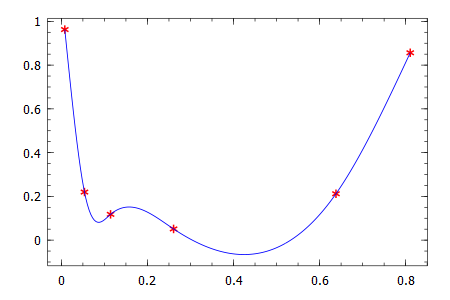

In [15]:
# Crtanje
plot(x,y,"r*",xx,ySpline,"b")

Usporedimo splajn s interpolacijskim polinomom:

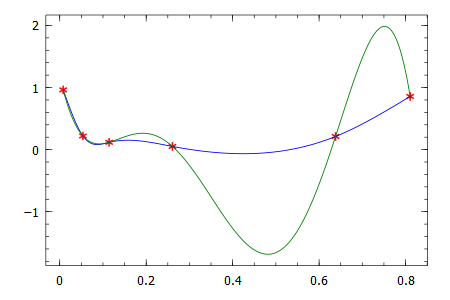

In [16]:
A=Vandermonde(x)
p=Poly(A\y)
yPoly=polyval(p,xx)
plot(x,y,"r*",xx,ySpline,"b",xx,yPoly,"g")

Usporedimo splajn s interpolacijskim polinomom kada mijenjamo jednu točku:

In [17]:
using Interact

Interact.Options{:SelectionSlider,Float64}(1: "input" = 0.15366264791562326 Float64 , "xp", 0.15366264791562326, "0.15366264791562326", 11, Interact.OptionDict(DataStructures.OrderedDict("0.05366264791562325"=>0.0536626,"0.06366264791562325"=>0.0636626,"0.07366264791562326"=>0.0736626,"0.08366264791562325"=>0.0836626,"0.09366264791562326"=>0.0936626,"0.10366264791562325"=>0.103663,"0.11366264791562325"=>0.113663,"0.12366264791562326"=>0.123663,"0.13366264791562327"=>0.133663,"0.14366264791562325"=>0.143663…), Dict(0.243663=>"0.24366264791562325",0.113663=>"0.11366264791562325",0.253663=>"0.25366264791562326",0.123663=>"0.12366264791562326",0.103663=>"0.10366264791562325",0.183663=>"0.18366264791562326",0.0836626=>"0.08366264791562325",0.173663=>"0.17366264791562325",0.0736626=>"0.07366264791562326",0.233663=>"0.23366264791562324"…)), Any[], Any[], true, "horizontal")

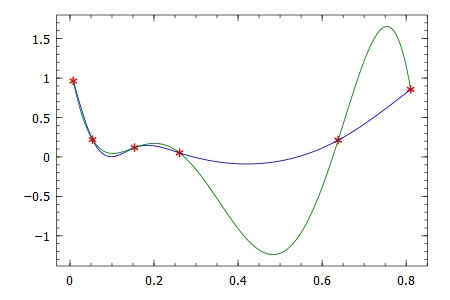

In [18]:
# Traje duze!
point=3
xc=deepcopy(x)

ySpline=Array{Float64}(lsize)
yPoly=Array{Float64}(lsize)
C=Array{Any}(n)

@manipulate for xp=xc[point-1]:0.01:xc[point+1]
    xc[point]=xp
    h=xc[2:end]-xc[1:end-1]
    d=(y[2:end]-y[1:end-1])./h
    H=SymTridiagonal(2*(h[1:end-1]+h[2:end]),h[2:end-1])
    b1=6*(d[2:end]-d[1:end-1])
    s=H\b1
    s=[0;s;0]
    b=d-(s[2:end]-s[1:end-1]).*h/6
    C=[xx-> y[i]-s[i]*h[i]^2/6+b[i]*(xx-xc[i])+s[i]*(xc[i+1]-xx)^3/(6*h[i])+s[i+1]*(xx-xc[i])^3/(6*h[i]) for i=1:n]
    for i=1:lsize
        for k=1:n
            if xx[i]<=xc[k+1]
                ySpline[i]=C[k](xx[i])
                break
            end
        end
    end
    A=Vandermonde(xc)
    p=Poly(A\y)
    yPoly=polyval(p,xx)
    plot(xc,y,"r*",xx,ySpline,"b",xx,yPoly,"g")
end

## Primjer - Interpolacija funkcije $\sin(x)$

Interact.Options{:SelectionSlider,Float64}(5: "input-2" = 1.2483185307179587 Float64 , "xp", 1.2483185307179587, "1.2483185307179587", 63, Interact.OptionDict(DataStructures.OrderedDict("0.6283185307179586"=>0.628319,"0.6383185307179586"=>0.638319,"0.6483185307179586"=>0.648319,"0.6583185307179586"=>0.658319,"0.6683185307179587"=>0.668319,"0.6783185307179587"=>0.678319,"0.6883185307179587"=>0.688319,"0.6983185307179586"=>0.698319,"0.7083185307179586"=>0.708319,"0.7183185307179586"=>0.718319…), Dict(0.968319=>"0.9683185307179586",0.848319=>"0.8483185307179586",1.46832=>"1.4683185307179587",1.82832=>"1.8283185307179586",1.61832=>"1.6183185307179586",0.688319=>"0.6883185307179587",1.28832=>"1.2883185307179585",1.36832=>"1.3683185307179586",1.06832=>"1.0683185307179586",1.30832=>"1.3083185307179586"…)), Any[], Any[], true, "horizontal")

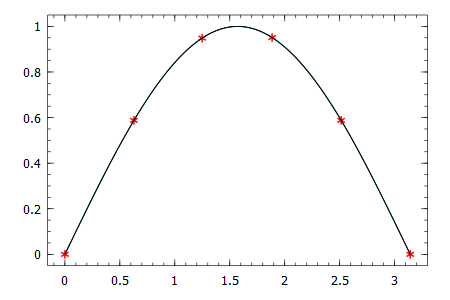

In [19]:
n=5
a=0
b=pi
f(x)=sin.(x)

x=collect(linspace(a,b,n+1))
y=f(x)
lsize=200
xx=collect(linspace(a,b,lsize))
ySpline=Array{Float64}(lsize)
yPoly=Array{Float64}(lsize)
yFun=f(xx)

point=3
xc=deepcopy(x)
yc=deepcopy(y)
@manipulate for xp=xc[point-1]:0.01:xc[point+1]
    # Splajn
    xc[point]=xp
    yc[point]=sin(xp)
    h=xc[2:end]-xc[1:end-1]
    d=(yc[2:end]-yc[1:end-1])./h
    H=SymTridiagonal(2*(h[1:end-1]+h[2:end]),h[2:end-1])
    b1=6*(d[2:end]-d[1:end-1])
    s=H\b1
    s=[0;s;0]
    b=d-(s[2:end]-s[1:end-1]).*h/6
    C=Array{Any}(n)
    C=[xx-> yc[i]-s[i]*h[i]^2/6+b[i]*(xx-xc[i])+s[i]*(xc[i+1]-xx)^3/(6*h[i])+s[i+1]*(xx-xc[i])^3/(6*h[i]) for i=1:n]
    for i=1:lsize
        for k=1:n
            if xx[i]<=xc[k+1]
                ySpline[i]=C[k](xx[i])
                break
            end
        end
    end
    
    # Polinom
    A=Vandermonde(xc)
    p=Poly(A\yc)
    yPoly=polyval(p,xx)
    
    plot(xc,yc,"r*",xx,ySpline,"b",xx,yPoly,"g",xx,yFun)
    # Pogreske
    # norm(ySpline[2:end-1]-yFun[2:end-1],Inf), norm((ySpline[2:end-1]-yFun[2:end-1])./yFun[2:end-1],Inf),
    # norm(yPoly[2:end-1]-yFun[2:end-1],Inf), norm((yPoly[2:end-1]-yFun[2:end-1])./yFun[2:end-1],Inf)
    
end

## Primjer - Interpolacija funkcije $f(x)=1-|x-1|$, $x\in[0,2]$

Interact.Options{:SelectionSlider,Float64}(9: "input-3" = 0.4 Float64 , "xp", 0.4, "0.4", 21, Interact.OptionDict(DataStructures.OrderedDict("0.2"=>0.2,"0.21"=>0.21,"0.22"=>0.22,"0.23"=>0.23,"0.24"=>0.24,"0.25"=>0.25,"0.26"=>0.26,"0.27"=>0.27,"0.28"=>0.28,"0.29"=>0.29…), Dict(0.6=>"0.6",0.3=>"0.3",0.43=>"0.43",0.54=>"0.54",0.32=>"0.32",0.26=>"0.26",0.45=>"0.45",0.51=>"0.51",0.25=>"0.25",0.35=>"0.35"…)), Any[], Any[], true, "horizontal")

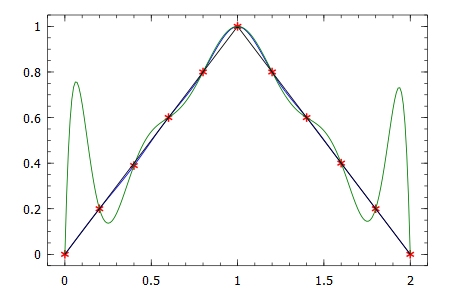

In [20]:
n=10
a=0
b=2
f(x)=1-abs.(x-1)

# Ravnomjerno raspoređene točke
x=collect(linspace(a,b,n+1))
y=f(x)
lsize=200
xx=collect(linspace(a,b,lsize))
ySpline=Array{Float64}(lsize)
yPoly=Array{Float64}(lsize)
yFun=f(xx)

point=3
xc=deepcopy(x)
yc=deepcopy(y)
@manipulate for xp=xc[point-1]:0.01:xc[point+1]
    # Splajn
    xc[point]=xp
    yc[point]=sin(xp)
    h=xc[2:end]-xc[1:end-1]
    d=(yc[2:end]-yc[1:end-1])./h
    H=SymTridiagonal(2*(h[1:end-1]+h[2:end]),h[2:end-1])
    b1=6*(d[2:end]-d[1:end-1])
    s=H\b1
    s=[0;s;0]
    b=d-(s[2:end]-s[1:end-1]).*h/6
    C=Array{Any}(n)
    C=[xx-> yc[i]-s[i]*h[i]^2/6+b[i]*(xx-xc[i])+s[i]*(xc[i+1]-xx)^3/(6*h[i])+s[i+1]*(xx-xc[i])^3/(6*h[i]) for i=1:n]
    for i=1:lsize
        for k=1:n
            if xx[i]<=xc[k+1]
                ySpline[i]=C[k](xx[i])
                break
            end
        end
    end
    
    # Polinom
    A=Vandermonde(xc)
    p=Poly(A\yc)
    yPoly=polyval(p,xx)
    
    plot(xc,yc,"r*",xx,ySpline,"b",xx,yPoly,"g",xx,yFun)
end